In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# pd.set_option('display.max_rows', None)
from datetime import datetime,timedelta
import seaborn as sns

print(sys.version)
print(np.__version__)
print(pd.__version__)

%matplotlib inline

3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
1.16.5
0.25.1


### Import CSV Data 
Q1 2020 All Packline Outcount.

Explain the datasets and which were used.

In [2]:
df_all = pd.read_csv('../data/all.csv')
df_perf = pd.read_csv('../data/performance.csv')
df_qual = pd.read_csv('../data/quality.csv')
df_avail = pd.read_csv('../data/availability.csv')

In [3]:
df_all.shape, df_perf.shape, df_qual.shape, df_avail.shape

((3141, 11), (3141, 4), (3141, 4), (3141, 4))

In [4]:
print('Data types for df_all:')
print(df_all.dtypes,'\n')
print('Data types for df_perf:')
print(df_perf.dtypes, '\n')
print('Data types for df_qual:')
print(df_qual.dtypes, '\n')
print('Data types for df_avail:')
print(df_avail.dtypes, '\n')

Data types for df_all:
Day of Start Time        object
Location Name            object
Shift Name               object
Calculated OEE           object
Avg. Availability       float64
Avg. Performance        float64
Avg. Quality            float64
Down Seconds              int64
Out Count               float64
Target                  float64
Theoretical Quantity    float64
dtype: object 

Data types for df_perf:
Day of Start Time     object
Location Name         object
Shift Name            object
Avg. Performance     float64
dtype: object 

Data types for df_qual:
Day of Start Time     object
Location Name         object
Shift Name            object
Avg. Quality         float64
dtype: object 

Data types for df_avail:
Day of Start Time     object
Location Name         object
Shift Name            object
Avg. Availability    float64
dtype: object 



## df_all

In [5]:
df_all.head()

,Day of Start Time,Location Name,Shift Name,Calculated OEE,Avg. Availability,Avg. Performance,Avg. Quality,Down Seconds,Out Count,Target,Theoretical Quantity
0,25-Feb-20,Food Safety,3rd,0.00%,1.0,0.0,0.0,0,0.0,0.0,496.94998
1,16-Mar-20,Food Safety,3rd,0.00%,1.0,0.0,0.0,0,0.0,0.0,0.95000
2,24-Jan-20,Food Safety,2nd,0.00%,1.0,0.0,0.0,0,0.0,0.0,495.14999
3,28-Jan-20,Food Safety,2nd,0.00%,1.0,0.0,0.0,0,0.0,0.0,495.60001
4,6-Feb-20,Food Safety,2nd,0.00%,1.0,0.0,0.0,0,0.0,0.0,495.29999


Rename columns

In [6]:
# Rename df_all columns
df_all.rename(columns = {'Day of Start Time':'date',
                         'Location Name':'location',
                         'Shift Name':'production_shift',
                         'Calculated OEE':'calculated_oee',
                         'Avg. Availability':'availability',
                         'Avg. Performance':'performance',
                         'Avg. Quality':'quality',
                         'Down Seconds':'downtime',
                         'Out Count':'out_count',
                         'Target':'target_oee',
                         'Theoretical Quantity':'theoretical_quantity'}, inplace = True)


In [7]:
df_all.head()

,date,location,production_shift,calculated_oee,availability,performance,quality,downtime,out_count,target_oee,theoretical_quantity
0,25-Feb-20,Food Safety,3rd,0.00%,1.0,0.0,0.0,0,0.0,0.0,496.94998
1,16-Mar-20,Food Safety,3rd,0.00%,1.0,0.0,0.0,0,0.0,0.0,0.95000
2,24-Jan-20,Food Safety,2nd,0.00%,1.0,0.0,0.0,0,0.0,0.0,495.14999
3,28-Jan-20,Food Safety,2nd,0.00%,1.0,0.0,0.0,0,0.0,0.0,495.60001
4,6-Feb-20,Food Safety,2nd,0.00%,1.0,0.0,0.0,0,0.0,0.0,495.29999


## df_perf

In [8]:
df_perf.head()

,Day of Start Time,Location Name,Shift Name,Avg. Performance
0,25-Feb-20,Food Safety,3rd,0.0
1,16-Mar-20,Food Safety,3rd,0.0
2,24-Jan-20,Food Safety,2nd,0.0
3,28-Jan-20,Food Safety,2nd,0.0
4,6-Feb-20,Food Safety,2nd,0.0


In [9]:
# Rename columns
df_perf.rename(columns = {'Day of Start Time':'date',
                         'Location Name':'location',
                         'Shift Name':'production_shift',
                         'Avg. Performance':'performance'}, inplace = True)

In [10]:
df_perf.head()

,date,location,production_shift,performance
0,25-Feb-20,Food Safety,3rd,0.0
1,16-Mar-20,Food Safety,3rd,0.0
2,24-Jan-20,Food Safety,2nd,0.0
3,28-Jan-20,Food Safety,2nd,0.0
4,6-Feb-20,Food Safety,2nd,0.0


## df_qual

In [11]:
df_qual.head()

,Day of Start Time,Location Name,Shift Name,Avg. Quality
0,25-Feb-20,Food Safety,3rd,0.0
1,16-Mar-20,Food Safety,3rd,0.0
2,24-Jan-20,Food Safety,2nd,0.0
3,28-Jan-20,Food Safety,2nd,0.0
4,6-Feb-20,Food Safety,2nd,0.0


In [12]:
# Rename df_qual columns
df_qual.rename(columns = {'Day of Start Time':'date',
                          'Location Name':'location',
                          'Shift Name':'production_shift',
                          'Avg. Quality':'quality'}, inplace = True)


In [13]:
df_qual.head()

,date,location,production_shift,quality
0,25-Feb-20,Food Safety,3rd,0.0
1,16-Mar-20,Food Safety,3rd,0.0
2,24-Jan-20,Food Safety,2nd,0.0
3,28-Jan-20,Food Safety,2nd,0.0
4,6-Feb-20,Food Safety,2nd,0.0


In [14]:
df_avail.head()

,Day of Start Time,Location Name,Shift Name,Avg. Availability
0,25-Feb-20,Food Safety,3rd,1.0
1,16-Mar-20,Food Safety,3rd,1.0
2,24-Jan-20,Food Safety,2nd,1.0
3,28-Jan-20,Food Safety,2nd,1.0
4,6-Feb-20,Food Safety,2nd,1.0


In [15]:
# Rename columns
df_avail.rename(columns = {'Day of Start Time':'date',
                           'Location Name':'location',
                           'Shift Name':'production_shift',
                           'Avg. Availability':'availability'}, inplace = True)


In [16]:
df_avail.head()

,date,location,production_shift,availability
0,25-Feb-20,Food Safety,3rd,1.0
1,16-Mar-20,Food Safety,3rd,1.0
2,24-Jan-20,Food Safety,2nd,1.0
3,28-Jan-20,Food Safety,2nd,1.0
4,6-Feb-20,Food Safety,2nd,1.0


## Perform Data cleansing

In [17]:
df_all = df_all.astype({'out_count': 'int'})

In [18]:
df_all.head(10)

,date,location,production_shift,calculated_oee,availability,performance,quality,downtime,out_count,target_oee,theoretical_quantity
0,25-Feb-20,Food Safety,3rd,0.00%,1.000000,0.000000,0.000000,0,0,0.0,496.94998
1,16-Mar-20,Food Safety,3rd,0.00%,1.000000,0.000000,0.000000,0,0,0.0,0.95000
2,24-Jan-20,Food Safety,2nd,0.00%,1.000000,0.000000,0.000000,0,0,0.0,495.14999
3,28-Jan-20,Food Safety,2nd,0.00%,1.000000,0.000000,0.000000,0,0,0.0,495.60001
4,6-Feb-20,Food Safety,2nd,0.00%,1.000000,0.000000,0.000000,0,0,0.0,495.29999
5,25-Mar-20,Food Safety,2nd,0.00%,1.000000,0.000000,0.000000,0,0,0.0,495.66666
6,10-Apr-20,Food Safety,2nd,0.00%,1.000000,0.000000,0.000000,0,0,0.0,495.45001
7,2-Jan-20,Packing Line 01,3rd,53.90%,0.779221,0.700004,0.987946,5100,8770,0.6,16274.42300
8,3-Jan-20,Packing Line 01,3rd,49.60%,0.961575,0.518755,0.993940,971,9185,0.6,18525.65200
9,4-Jan-20,Packing Line 01,3rd,66.20%,0.857289,0.773363,0.998420,3346,11378,0.6,17188.67800


In [19]:
# Change date to datetime.
def create_datetime_obj(date_string):
    date_string = date_string.split('-')
    day = date_string[0]
    month = date_string[1]
    year = date_string[2]
    date_time = month + '/' + day + '/' + year
    datetime_obj = datetime.strptime(date_time,'%b/%d/%y')
    return datetime_obj

# Check if function works
create_datetime_obj(df_all.date[0])

datetime.datetime(2020, 2, 25, 0, 0)

In [20]:
# Convert all date column to datetime data type.
df_all['date'] = df_all['date'].map(lambda x: create_datetime_obj(x))

In [21]:
df_all.head(10)

,date,location,production_shift,calculated_oee,availability,performance,quality,downtime,out_count,target_oee,theoretical_quantity
0,2020-02-25,Food Safety,3rd,0.00%,1.000000,0.000000,0.000000,0,0,0.0,496.94998
1,2020-03-16,Food Safety,3rd,0.00%,1.000000,0.000000,0.000000,0,0,0.0,0.95000
2,2020-01-24,Food Safety,2nd,0.00%,1.000000,0.000000,0.000000,0,0,0.0,495.14999
3,2020-01-28,Food Safety,2nd,0.00%,1.000000,0.000000,0.000000,0,0,0.0,495.60001
4,2020-02-06,Food Safety,2nd,0.00%,1.000000,0.000000,0.000000,0,0,0.0,495.29999
5,2020-03-25,Food Safety,2nd,0.00%,1.000000,0.000000,0.000000,0,0,0.0,495.66666
6,2020-04-10,Food Safety,2nd,0.00%,1.000000,0.000000,0.000000,0,0,0.0,495.45001
7,2020-01-02,Packing Line 01,3rd,53.90%,0.779221,0.700004,0.987946,5100,8770,0.6,16274.42300
8,2020-01-03,Packing Line 01,3rd,49.60%,0.961575,0.518755,0.993940,971,9185,0.6,18525.65200
9,2020-01-04,Packing Line 01,3rd,66.20%,0.857289,0.773363,0.998420,3346,11378,0.6,17188.67800


In [22]:
df_all.loc[:,['availability', 'performance', 'quality']] = df_all.loc[:,['availability', 'performance', 'quality']].round(4)
df_all.loc[:,['theoretical_quantity']]  = df_all.loc[:,['theoretical_quantity']].round(2)
df_all.reset_index(inplace=True,drop=True)

In [23]:
df_all.head(10)

,date,location,production_shift,calculated_oee,availability,performance,quality,downtime,out_count,target_oee,theoretical_quantity
0,2020-02-25,Food Safety,3rd,0.00%,1.0000,0.0000,0.0000,0,0,0.0,496.95
1,2020-03-16,Food Safety,3rd,0.00%,1.0000,0.0000,0.0000,0,0,0.0,0.95
2,2020-01-24,Food Safety,2nd,0.00%,1.0000,0.0000,0.0000,0,0,0.0,495.15
3,2020-01-28,Food Safety,2nd,0.00%,1.0000,0.0000,0.0000,0,0,0.0,495.60
4,2020-02-06,Food Safety,2nd,0.00%,1.0000,0.0000,0.0000,0,0,0.0,495.30
5,2020-03-25,Food Safety,2nd,0.00%,1.0000,0.0000,0.0000,0,0,0.0,495.67
6,2020-04-10,Food Safety,2nd,0.00%,1.0000,0.0000,0.0000,0,0,0.0,495.45
7,2020-01-02,Packing Line 01,3rd,53.90%,0.7792,0.7000,0.9879,5100,8770,0.6,16274.42
8,2020-01-03,Packing Line 01,3rd,49.60%,0.9616,0.5188,0.9939,971,9185,0.6,18525.65
9,2020-01-04,Packing Line 01,3rd,66.20%,0.8573,0.7734,0.9984,3346,11378,0.6,17188.68


In [24]:
def round_column(df, column):
    df.loc[:'column'] = df.loc[:'column'].round(4)
    return df.reset_index(inplace=True,drop=True)

In [25]:
round_column(df_perf, 'performance')
round_column(df_avail, 'availability')
round_column(df_qual, 'quality')

In [26]:
display(df_perf.head(10))
display(df_qual.head(10))
display(df_avail.head(10))

,date,location,production_shift,performance
0,25-Feb-20,Food Safety,3rd,0.0000
1,16-Mar-20,Food Safety,3rd,0.0000
2,24-Jan-20,Food Safety,2nd,0.0000
3,28-Jan-20,Food Safety,2nd,0.0000
4,6-Feb-20,Food Safety,2nd,0.0000
5,25-Mar-20,Food Safety,2nd,0.0000
6,10-Apr-20,Food Safety,2nd,0.0000
7,2-Jan-20,Packing Line 01,3rd,0.7000
8,3-Jan-20,Packing Line 01,3rd,0.5188
9,4-Jan-20,Packing Line 01,3rd,0.7734


,date,location,production_shift,quality
0,25-Feb-20,Food Safety,3rd,0.0000
1,16-Mar-20,Food Safety,3rd,0.0000
2,24-Jan-20,Food Safety,2nd,0.0000
3,28-Jan-20,Food Safety,2nd,0.0000
4,6-Feb-20,Food Safety,2nd,0.0000
5,25-Mar-20,Food Safety,2nd,0.0000
6,10-Apr-20,Food Safety,2nd,0.0000
7,2-Jan-20,Packing Line 01,3rd,0.9879
8,3-Jan-20,Packing Line 01,3rd,0.9939
9,4-Jan-20,Packing Line 01,3rd,0.9984


,date,location,production_shift,availability
0,25-Feb-20,Food Safety,3rd,1.0000
1,16-Mar-20,Food Safety,3rd,1.0000
2,24-Jan-20,Food Safety,2nd,1.0000
3,28-Jan-20,Food Safety,2nd,1.0000
4,6-Feb-20,Food Safety,2nd,1.0000
5,25-Mar-20,Food Safety,2nd,1.0000
6,10-Apr-20,Food Safety,2nd,1.0000
7,2-Jan-20,Packing Line 01,3rd,0.7792
8,3-Jan-20,Packing Line 01,3rd,0.9616
9,4-Jan-20,Packing Line 01,3rd,0.8573


In [27]:
print('df_perf locations:')
print(df_perf.location.unique(),'\n')
print('df_qual locations:')
print(df_qual.location.unique(),'\n')
print('df_avail locations:')
print(df_avail.location.unique(),'\n')

df_perf locations:
['Food Safety' 'Packing Line 01' 'Packing Line 02' 'Packing Line 03'
 'Packing Line 04' 'Packing Line 05' 'Packing Line 06' 'Packing Line 07'
 'Packing Line 08' 'Packing Line 09' 'Packing Line 10' 'Packing Line 11'
 'Packing Line 12' 'Packing Line 13' 'Packing Line 14' 'Quality Lab'
 'Wash Line 1'] 

df_qual locations:
['Food Safety' 'Packing Line 01' 'Packing Line 02' 'Packing Line 03'
 'Packing Line 04' 'Packing Line 05' 'Packing Line 06' 'Packing Line 07'
 'Packing Line 08' 'Packing Line 09' 'Packing Line 10' 'Packing Line 11'
 'Packing Line 12' 'Packing Line 13' 'Packing Line 14' 'Quality Lab'
 'Wash Line 1'] 

df_avail locations:
['Food Safety' 'Packing Line 01' 'Packing Line 02' 'Packing Line 03'
 'Packing Line 04' 'Packing Line 05' 'Packing Line 06' 'Packing Line 07'
 'Packing Line 08' 'Packing Line 09' 'Packing Line 10' 'Packing Line 11'
 'Packing Line 12' 'Packing Line 13' 'Packing Line 14' 'Quality Lab'
 'Wash Line 1'] 



In [28]:
# This code take the packline subset of the dataframe that was inititally imported.  Very cool code!!!
df_final = pd.DataFrame()
for num in range(1,15):
    PL = 'Packing Line {0:0=2d}'.format(num)
    print('Packing Line {0:0=2d}'.format(num))
    df_chunk = df_all[df_all['location']==PL]
    df_final = pd.concat([df_final, df_chunk])

Packing Line 01
Packing Line 02
Packing Line 03
Packing Line 04
Packing Line 05
Packing Line 06
Packing Line 07
Packing Line 08
Packing Line 09
Packing Line 10
Packing Line 11
Packing Line 12
Packing Line 13
Packing Line 14


In [29]:
df_final['oee'] = (df_final['performance']*df_final['quality']*df_final['availability']*100).round(2)
df_final.reset_index(inplace=True,drop=True)
df_final.head()

packline_type = {'Packing Line 01': 'mesh',
                 'Packing Line 02': 'mesh',
                 'Packing Line 03': 'mesh',
                 'Packing Line 04': 'vertical mesh',
                 'Packing Line 05': 'wicket mesh',
                 'Packing Line 06': 'mesh',
                 'Packing Line 07': 'poly',
                 'Packing Line 08': 'poly',
                 'Packing Line 09': 'poly',
                 'Packing Line 10': 'pouch',
                 'Packing Line 11': 'pouch',
                 'Packing Line 12': 'tray',
                 'Packing Line 13': 'bulk',
                 'Packing Line 14': 'steam pack mini'
               }
packline_details = {'Packing Line 01': 'single_mesh',
                    'Packing Line 02': 'double_mesh',
                    'Packing Line 03': 'single_mesh',
                    'Packing Line 04': 'N/A',
                    'Packing Line 05': 'N/A',
                    'Packing Line 06': 'double_mesh',
                    'Packing Line 07': 'triangle',
                    'Packing Line 08': 'triangle',
                    'Packing Line 09': 'matrix',
                    'Packing Line 10': 'N/A',
                    'Packing Line 11': 'N/A',
                    'Packing Line 12': 'N/A',
                    'Packing Line 13': 'N/A',
                    'Packing Line 14': 'N/A'
                   }

df_final.insert(5,'packline_type',df_final.location.map(packline_type))
df_final.insert(6,'packline_details',df_final.location.map(packline_details))
df_final.head()

,date,location,production_shift,calculated_oee,availability,packline_type,packline_details,performance,quality,downtime,out_count,target_oee,theoretical_quantity,oee
0,2020-01-02,Packing Line 01,3rd,53.90%,0.7792,mesh,single_mesh,0.7000,0.9879,5100,8770,0.6,16274.42,53.88
1,2020-01-03,Packing Line 01,3rd,49.60%,0.9616,mesh,single_mesh,0.5188,0.9939,971,9185,0.6,18525.65,49.58
2,2020-01-04,Packing Line 01,3rd,66.20%,0.8573,mesh,single_mesh,0.7734,0.9984,3346,11378,0.6,17188.68,66.20
3,2020-01-06,Packing Line 01,3rd,60.20%,0.9527,mesh,single_mesh,0.6340,0.9970,1199,11083,0.6,18406.52,60.22
4,2020-01-07,Packing Line 01,3rd,26.00%,0.9324,mesh,single_mesh,0.2792,0.9991,1500,4232,0.6,16269.25,26.01


In [30]:
# Find the shift with the best OEE
df_shift_mean = df_final.groupby(['date','production_shift']).mean()
df_shift_mean.head()

availability  performance   quality     downtime  \
date       production_shift                                                     
2020-01-02 1st                   0.803178     0.677878  0.918833  2438.000000   
           2nd                   0.846983     0.637517  0.990525  2931.166667   
           3rd                   0.844167     0.684667  0.906592  3156.583333   
2020-01-03 1st                   0.887582     0.699827  0.962191  2064.909091   
           2nd                   0.799808     0.664792  0.949458  4689.833333   

                                out_count  target_oee  theoretical_quantity  \
date       production_shift                                                   
2020-01-02 1st               10216.000000    0.800000          15050.214444   
           2nd                7596.916667    0.750000          14206.294167   
           3rd                7898.000000    1.000000          13634.005833   
2020-01-03 1st                9056.636364    0.927273          13743.631818   
           2nd                8863.500000    0.650000          15788.598333   

                                   oee  
date       production_shift             
2020-01-02 1st               57.422222  
           2nd               54.649167  
           3rd               57.616667  
2020-01-03 1st               60.602727  
           2nd               52.634167

In [31]:
df_shift_mean_unstack = df_shift_mean.unstack()
df_shift_mean_unstack['oee'].head()

production_shift,1st,2nd,3rd
date,,,
2020-01-02,57.422222,54.649167,57.616667
2020-01-03,60.602727,52.634167,104.625000
2020-01-04,69.733333,57.064167,52.313636
2020-01-05,0.000000,NaN,NaN
2020-01-06,57.371818,54.575455,61.234167


In [32]:
#df_shift_oee = df_shift_mean_unstack.loc[:,['oee']]
df_shift_oee = df_shift_mean_unstack['oee']
df_shift_oee['best_shift'] = df_shift_oee.idxmax(axis=1)

C:\Users\samuel.gomez\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
df_shift_oee.head()

production_shift,1st,2nd,3rd,best_shift
date,,,,
2020-01-02,57.422222,54.649167,57.616667,3rd
2020-01-03,60.602727,52.634167,104.625000,3rd
2020-01-04,69.733333,57.064167,52.313636,1st
2020-01-05,0.000000,NaN,NaN,1st
2020-01-06,57.371818,54.575455,61.234167,3rd


### Which shift had the best OEE across all data?

In [34]:
# Determine which shift had the best oee per day
df_shift_oee['best_shift'].value_counts()

3rd    37
1st    33
2nd    25
Name: best_shift, dtype: int64

In [35]:
df_shift_sum = df_final.groupby(['date','production_shift']).sum()
df_shift_sum.head()

availability  performance  quality  downtime  \
date       production_shift                                                 
2020-01-02 1st                     7.2286       6.1009   8.2695     21942   
           2nd                    10.1638       7.6502  11.8863     35174   
           3rd                    10.1300       8.2160  10.8791     37879   
2020-01-03 1st                     9.7634       7.6981  10.5841     22714   
           2nd                     9.5977       7.9775  11.3935     56278   

                             out_count  target_oee  theoretical_quantity  \
date       production_shift                                                
2020-01-02 1st                   91944    7.200000             135451.93   
           2nd                   91163    9.000000             170475.53   
           3rd                   94776   12.000000             163608.07   
2020-01-03 1st                   99623   10.200001             151179.95   
           2nd                  106362    7.800000             189463.18   

                                oee  
date       production_shift          
2020-01-02 1st               516.80  
           2nd               655.79  
           3rd               691.40  
2020-01-03 1st               666.63  
           2nd               631.61

## Which shift had the best out count total across all data? 

In [36]:
df_shift_sum_unstack = df_shift_sum.unstack()
df_shift_sum_unstack['out_count'].head()

production_shift,1st,2nd,3rd
date,,,
2020-01-02,91944.0,91163.0,94776.0
2020-01-03,99623.0,106362.0,81366.0
2020-01-04,90187.0,99630.0,95548.0
2020-01-05,0.0,NaN,NaN
2020-01-06,107545.0,92750.0,101806.0


In [37]:
# Find the best out count shift
df_shift_out_count = df_shift_sum_unstack['out_count']
df_shift_out_count['best_shift'] = df_shift_out_count.idxmax(axis=1)
display(df_shift_out_count.head())
df_shift_out_count['best_shift'].value_counts()

C:\Users\samuel.gomez\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


production_shift,1st,2nd,3rd,best_shift
date,,,,
2020-01-02,91944.0,91163.0,94776.0,3rd
2020-01-03,99623.0,106362.0,81366.0,2nd
2020-01-04,90187.0,99630.0,95548.0,2nd
2020-01-05,0.0,NaN,NaN,1st
2020-01-06,107545.0,92750.0,101806.0,1st


2nd    36
1st    33
3rd    26
Name: best_shift, dtype: int64

### Add day to column position 1 of df_final by extracting it from date column. 

In [38]:
day = df_final.date.map(lambda x: x.strftime("%A"))
df_final.insert(1, 'day', day)
df_final.head()

,date,day,location,production_shift,calculated_oee,availability,packline_type,packline_details,performance,quality,downtime,out_count,target_oee,theoretical_quantity,oee
0,2020-01-02,Thursday,Packing Line 01,3rd,53.90%,0.7792,mesh,single_mesh,0.7000,0.9879,5100,8770,0.6,16274.42,53.88
1,2020-01-03,Friday,Packing Line 01,3rd,49.60%,0.9616,mesh,single_mesh,0.5188,0.9939,971,9185,0.6,18525.65,49.58
2,2020-01-04,Saturday,Packing Line 01,3rd,66.20%,0.8573,mesh,single_mesh,0.7734,0.9984,3346,11378,0.6,17188.68,66.20
3,2020-01-06,Monday,Packing Line 01,3rd,60.20%,0.9527,mesh,single_mesh,0.6340,0.9970,1199,11083,0.6,18406.52,60.22
4,2020-01-07,Tuesday,Packing Line 01,3rd,26.00%,0.9324,mesh,single_mesh,0.2792,0.9991,1500,4232,0.6,16269.25,26.01


### Add week number to column position 0 of df_final by extracting it from date column. 

In [39]:
week_num = df_final.date.map(lambda x: x.strftime("%U"))
df_final.insert(0, 'week_num', week_num)
df_final.head(10)

,week_num,date,day,location,production_shift,calculated_oee,availability,packline_type,packline_details,performance,quality,downtime,out_count,target_oee,theoretical_quantity,oee
0,00,2020-01-02,Thursday,Packing Line 01,3rd,53.90%,0.7792,mesh,single_mesh,0.7000,0.9879,5100,8770,0.6,16274.42,53.88
1,00,2020-01-03,Friday,Packing Line 01,3rd,49.60%,0.9616,mesh,single_mesh,0.5188,0.9939,971,9185,0.6,18525.65,49.58
2,00,2020-01-04,Saturday,Packing Line 01,3rd,66.20%,0.8573,mesh,single_mesh,0.7734,0.9984,3346,11378,0.6,17188.68,66.20
3,01,2020-01-06,Monday,Packing Line 01,3rd,60.20%,0.9527,mesh,single_mesh,0.6340,0.9970,1199,11083,0.6,18406.52,60.22
4,01,2020-01-07,Tuesday,Packing Line 01,3rd,26.00%,0.9324,mesh,single_mesh,0.2792,0.9991,1500,4232,0.6,16269.25,26.01
5,01,2020-01-08,Wednesday,Packing Line 01,3rd,42.80%,0.6557,mesh,single_mesh,0.6536,0.9992,9923,9003,0.6,21024.54,42.82
6,01,2020-01-09,Thursday,Packing Line 01,3rd,67.50%,0.8226,mesh,single_mesh,0.8354,0.9817,4204,11192,0.6,16589.90,67.46
7,01,2020-01-10,Friday,Packing Line 01,3rd,49.30%,0.8674,mesh,single_mesh,0.5704,0.9960,3759,9932,0.6,20154.96,49.28
8,01,2020-01-11,Saturday,Packing Line 01,3rd,77.40%,0.8606,mesh,single_mesh,0.9078,0.9909,2639,10259,0.6,13251.47,77.41
9,02,2020-01-13,Monday,Packing Line 01,3rd,60.10%,0.9566,mesh,single_mesh,0.6410,0.9802,1200,11641,0.6,19369.63,60.10


### Extract month name from date and add to df_final

In [40]:
# Add month column to df_final at position 0.
month = pd.to_datetime(df_final.date).dt.strftime('%B')
df_final.insert(0,'month',month)
df_final.head()

,month,week_num,date,day,location,production_shift,calculated_oee,availability,packline_type,packline_details,performance,quality,downtime,out_count,target_oee,theoretical_quantity,oee
0,January,00,2020-01-02,Thursday,Packing Line 01,3rd,53.90%,0.7792,mesh,single_mesh,0.7000,0.9879,5100,8770,0.6,16274.42,53.88
1,January,00,2020-01-03,Friday,Packing Line 01,3rd,49.60%,0.9616,mesh,single_mesh,0.5188,0.9939,971,9185,0.6,18525.65,49.58
2,January,00,2020-01-04,Saturday,Packing Line 01,3rd,66.20%,0.8573,mesh,single_mesh,0.7734,0.9984,3346,11378,0.6,17188.68,66.20
3,January,01,2020-01-06,Monday,Packing Line 01,3rd,60.20%,0.9527,mesh,single_mesh,0.6340,0.9970,1199,11083,0.6,18406.52,60.22
4,January,01,2020-01-07,Tuesday,Packing Line 01,3rd,26.00%,0.9324,mesh,single_mesh,0.2792,0.9991,1500,4232,0.6,16269.25,26.01


In [41]:
# This is what we want to graph packline oee, groub by week 
group_week_sum = df_final.groupby(['week_num', 'date','location','day', 'production_shift']).sum()
group_week_sum['oee'].unstack()

production_shift                                1st    2nd    3rd
week_num date       location        day                          
00       2020-01-02 Packing Line 01 Thursday  82.04  50.18  53.88
                    Packing Line 02 Thursday  70.87  71.26  75.44
                    Packing Line 04 Thursday    NaN  51.87  51.21
                    Packing Line 05 Thursday  21.55  39.12    NaN
                    Packing Line 06 Thursday    NaN  40.12  79.46
...                                             ...    ...    ...
14       2020-04-10 Packing Line 09 Friday    73.94  68.29    NaN
                    Packing Line 11 Friday    55.71  57.72    NaN
                    Packing Line 12 Friday    61.26  65.26    NaN
                    Packing Line 13 Friday     0.00  56.37    NaN
                    Packing Line 14 Friday     0.00   0.00    NaN

[1154 rows x 3 columns]

In [42]:
group_week_oee = group_week_sum['oee'].unstack()
group_week_oee.head(10)

production_shift                                 1st    2nd     3rd
week_num date       location        day                            
00       2020-01-02 Packing Line 01 Thursday   82.04  50.18   53.88
                    Packing Line 02 Thursday   70.87  71.26   75.44
                    Packing Line 04 Thursday     NaN  51.87   51.21
                    Packing Line 05 Thursday   21.55  39.12     NaN
                    Packing Line 06 Thursday     NaN  40.12   79.46
                    Packing Line 07 Thursday   76.07  38.70   33.37
                    Packing Line 08 Thursday   49.91  75.23   25.12
                    Packing Line 09 Thursday  106.30  77.70  116.71
                    Packing Line 10 Thursday   56.54  41.38   39.81
                    Packing Line 11 Thursday     NaN  24.41   51.92

In [43]:
# This is what we want to graph packline out count
group_week_sum['out_count'].unstack()

production_shift                                  1st      2nd      3rd
week_num date       location        day                                
00       2020-01-02 Packing Line 01 Thursday  15283.0   9708.0   8770.0
                    Packing Line 02 Thursday  11725.0  14093.0  13923.0
                    Packing Line 04 Thursday      NaN   5913.0   6117.0
                    Packing Line 05 Thursday    884.0   5477.0      NaN
                    Packing Line 06 Thursday      NaN   7557.0  16048.0
...                                               ...      ...      ...
14       2020-04-10 Packing Line 09 Friday    17882.0  25264.0      NaN
                    Packing Line 11 Friday     8136.0  12779.0      NaN
                    Packing Line 12 Friday     6153.0   4977.0      NaN
                    Packing Line 13 Friday        0.0    274.0      NaN
                    Packing Line 14 Friday        0.0      0.0      NaN

[1154 rows x 3 columns]

In [44]:
group_week_sum['oee'].head(20).unstack()

production_shift                                 1st    2nd    3rd
week_num date       location        day                           
00       2020-01-02 Packing Line 01 Thursday   82.04  50.18  53.88
                    Packing Line 02 Thursday   70.87  71.26  75.44
                    Packing Line 04 Thursday     NaN  51.87  51.21
                    Packing Line 05 Thursday   21.55  39.12    NaN
                    Packing Line 06 Thursday     NaN  40.12  79.46
                    Packing Line 07 Thursday   76.07  38.70  33.37
                    Packing Line 08 Thursday   49.91  75.23  25.12
                    Packing Line 09 Thursday  106.30  77.70    NaN

In [45]:
# Perform sum and count calculations of group by date and production shift. 
group_sum = df_final.groupby(['date', 'production_shift']).sum().unstack()
group_sum.head(20)
group_count = df_final.groupby(['date', 'production_shift']).count().unstack()
group_count.head()

month             week_num               day              \
production_shift   1st   2nd   3rd      1st   2nd   3rd   1st   2nd   3rd   
date                                                                        
2020-01-02         9.0  12.0  12.0      9.0  12.0  12.0   9.0  12.0  12.0   
2020-01-03        11.0  12.0  12.0     11.0  12.0  12.0  11.0  12.0  12.0   
2020-01-04        12.0  12.0  11.0     12.0  12.0  11.0  12.0  12.0  11.0   
2020-01-05         1.0   NaN   NaN      1.0   NaN   NaN   1.0   NaN   NaN   
2020-01-06        11.0  11.0  12.0     11.0  11.0  12.0  11.0  11.0  12.0   

                 location  ... out_count target_oee              \
production_shift      1st  ...       3rd        1st   2nd   3rd   
date                       ...                                    
2020-01-02            9.0  ...      12.0        9.0  12.0  12.0   
2020-01-03           11.0  ...      12.0       11.0  12.0  12.0   
2020-01-04           12.0  ...      11.0       12.0  12.0  11.0   
2020-01-05            1.0  ...       NaN        1.0   NaN   NaN   
2020-01-06           11.0  ...      12.0       11.0  11.0  12.0   

                 theoretical_quantity               oee              
production_shift                  1st   2nd   3rd   1st   2nd   3rd  
date                                                                 
2020-01-02                        9.0  12.0  12.0   9.0  12.0  12.0  
2020-01-03                       11.0  12.0  12.0  11.0  12.0  12.0  
2020-01-04                       12.0  12.0  11.0  12.0  12.0  11.0  
2020-01-05                        1.0   NaN   NaN   1.0   NaN   NaN  
2020-01-06                       11.0  11.0  12.0  11.0  11.0  12.0  

[5 rows x 45 columns]

(40, 80)

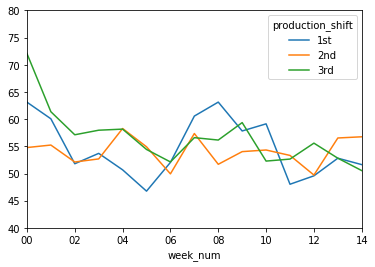

In [46]:
# This is what we want to graph packline oee
group_week = df_final.groupby(['week_num','production_shift'])
group_week['oee'].mean().round(2).unstack().plot(kind='line')
plt.ylim(40,80)

In [47]:
# GroupBy week number date and production_shift
group_wd = df_final.groupby(['week_num','date','production_shift'])
group_wd = group_wd['oee'].mean().round(2).unstack()
display(group_wd.loc['00',:])

production_shift,1st,2nd,3rd
date,,,
2020-01-02,57.42,54.65,57.62
2020-01-03,60.60,52.63,104.62
2020-01-04,69.73,57.06,52.31


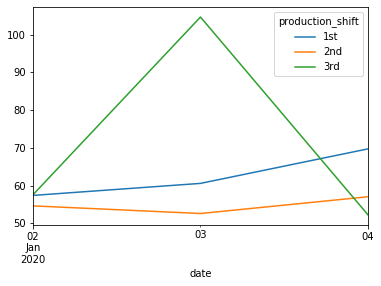

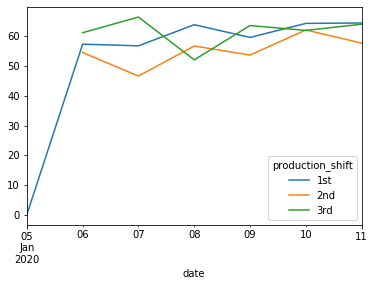

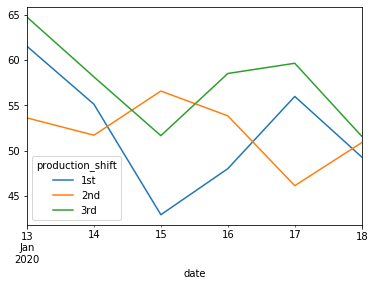

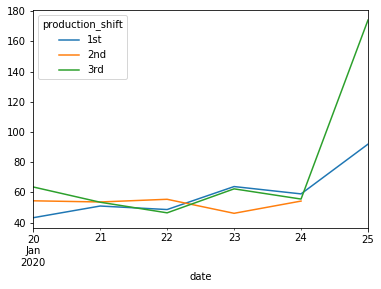

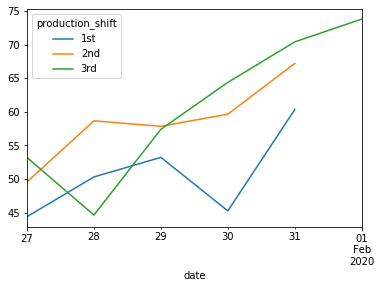

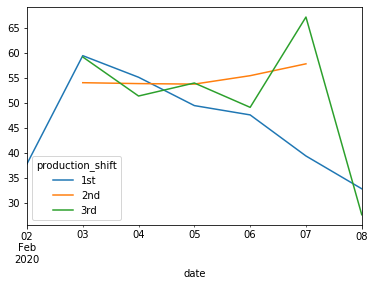

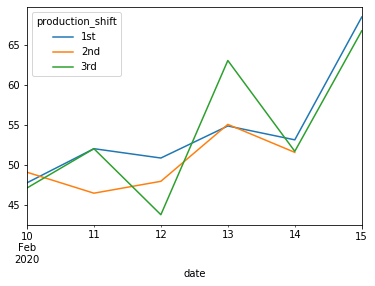

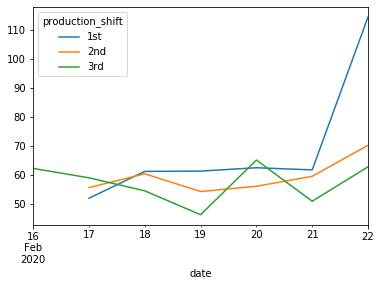

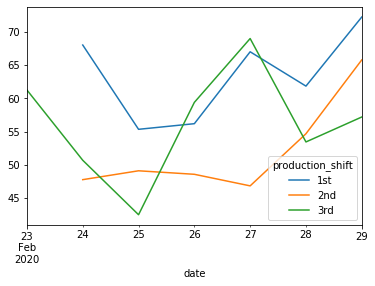

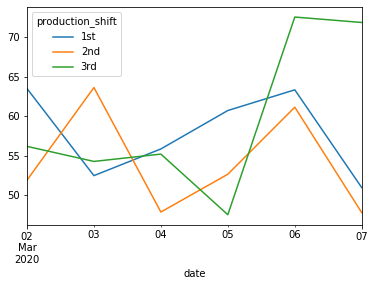

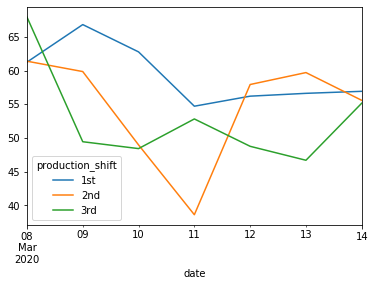

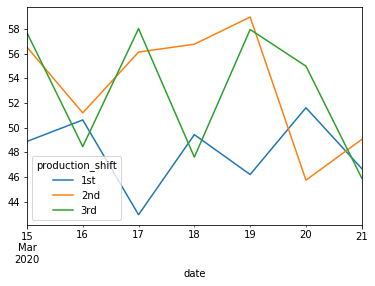

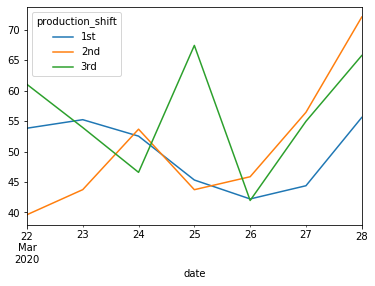

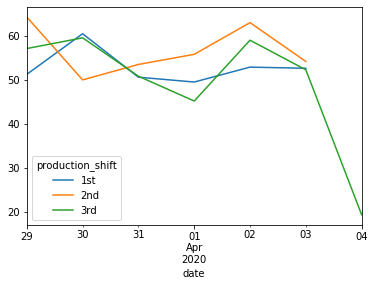

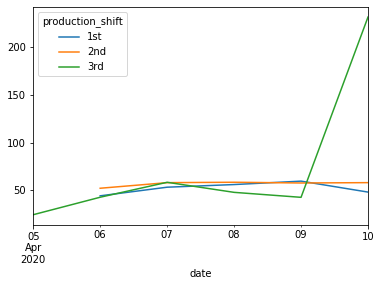

In [48]:
# Plot oee split by week.
num_of_weeks = len(group_wd.index.levels[0])
for i in range(num_of_weeks):
    # Create figure by week
    week_num = '{0:0>2d}'.format(i)
#     print(week_num)
#     display(group_test.loc[week_num,:])
#     plt.figure()
#     plt.bar()
    group_wd.loc[week_num,:].plot(kind='line')


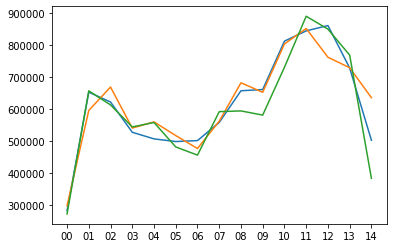

In [49]:
group_wps= df_final.groupby(['week_num','production_shift'])
# group_wps['out_count'].sum().round(2).unstack().plot(kind='bar');
plt.plot(group_wps['out_count'].sum().round(2).unstack())


In [50]:
df_final.head()

,month,week_num,date,day,location,production_shift,calculated_oee,availability,packline_type,packline_details,performance,quality,downtime,out_count,target_oee,theoretical_quantity,oee
0,January,00,2020-01-02,Thursday,Packing Line 01,3rd,53.90%,0.7792,mesh,single_mesh,0.7000,0.9879,5100,8770,0.6,16274.42,53.88
1,January,00,2020-01-03,Friday,Packing Line 01,3rd,49.60%,0.9616,mesh,single_mesh,0.5188,0.9939,971,9185,0.6,18525.65,49.58
2,January,00,2020-01-04,Saturday,Packing Line 01,3rd,66.20%,0.8573,mesh,single_mesh,0.7734,0.9984,3346,11378,0.6,17188.68,66.20
3,January,01,2020-01-06,Monday,Packing Line 01,3rd,60.20%,0.9527,mesh,single_mesh,0.6340,0.9970,1199,11083,0.6,18406.52,60.22
4,January,01,2020-01-07,Tuesday,Packing Line 01,3rd,26.00%,0.9324,mesh,single_mesh,0.2792,0.9991,1500,4232,0.6,16269.25,26.01


In [51]:
group_wd = df_final.groupby(['week_num','date','production_shift'])
group_wd = group_wd['out_count'].sum().round(2).unstack()

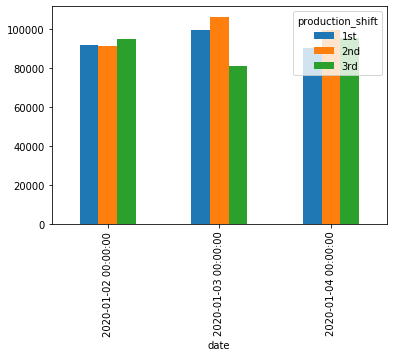

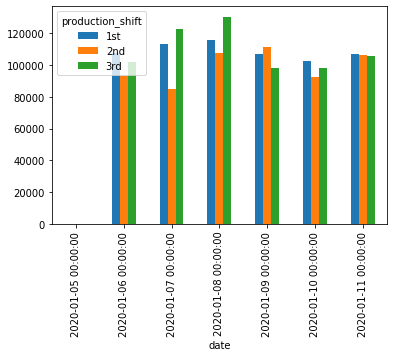

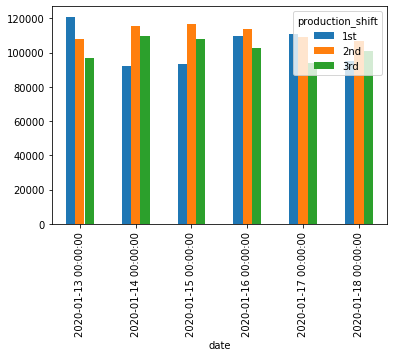

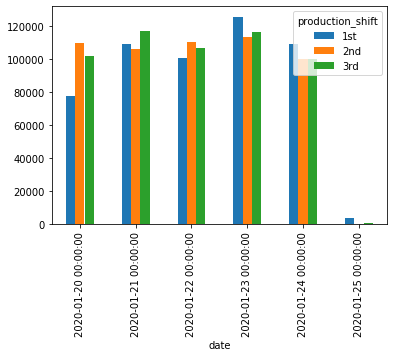

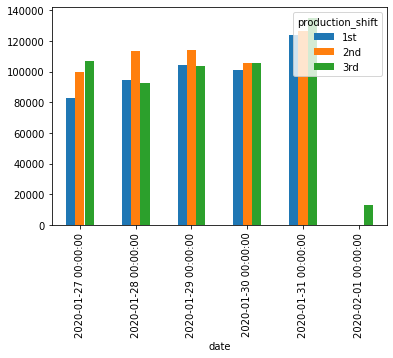

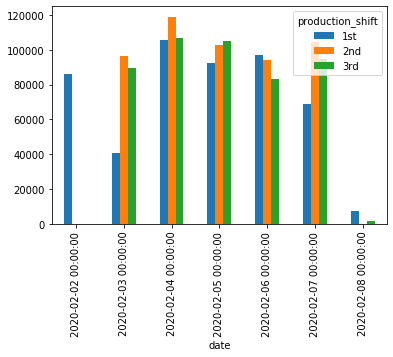

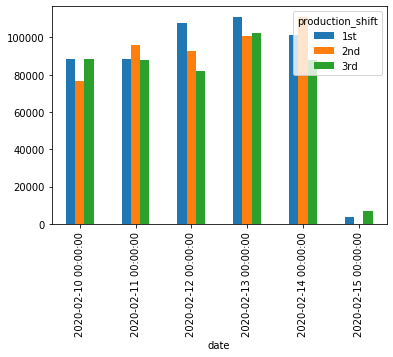

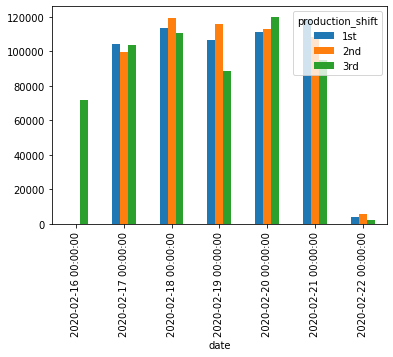

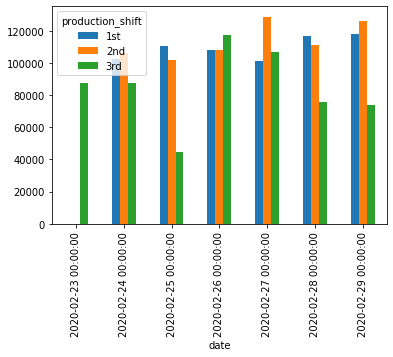

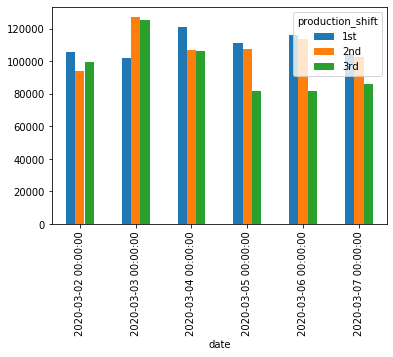

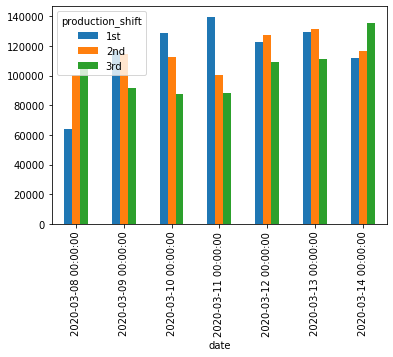

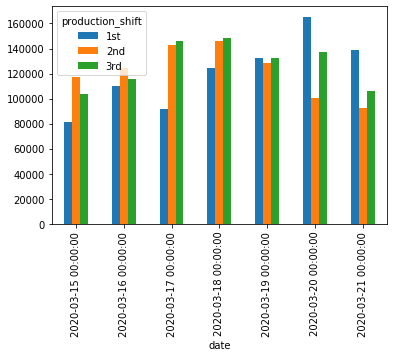

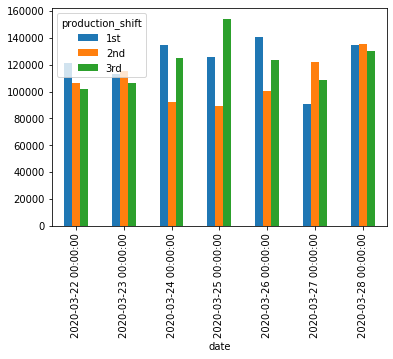

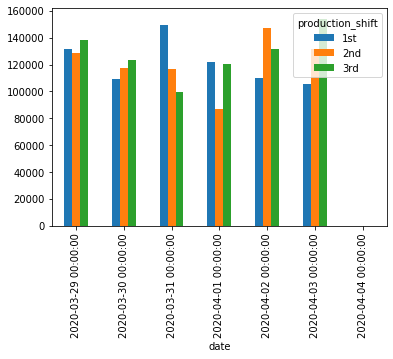

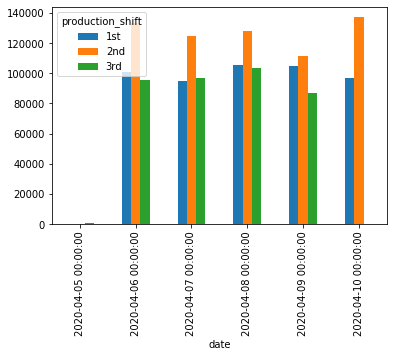

In [52]:
# Plot out count by week, total of 15 weeks/plots.
num_of_weeks = len(group_wd.index.levels[0])
for i in range(num_of_weeks):
    # Create figure by week
    week_num = '{0:0>2d}'.format(i)
    group_wd.loc[week_num,:].plot(kind='bar')

In [53]:
# Change date to datetime.
def create_datetime_obj(date_string):
    date_string = date_string.split('-')
    day = date_string[0]
    month = date_string[1]
    year = date_string[2]
    date_time = month + '/' + day + '/' + year
    datetime_obj = datetime.strptime(date_time,'%b/%d/%y')
    return datetime_obj

# Check if function works as intended
create_datetime_obj(df_qual.date[0])

datetime.datetime(2020, 2, 25, 0, 0)

In [54]:
df_perf['date'] = df_perf['date'].map(lambda x: create_datetime_obj(x))

In [55]:
group_test = group_week['oee'].mean().unstack().head()
display(group_test.head())
group_test['1st']

production_shift,1st,2nd,3rd
week_num,,,
00,63.132188,54.782500,72.067143
01,60.071765,55.241000,61.365286
02,51.801351,52.122632,57.133056
03,53.710161,52.687705,57.970333
04,50.677966,58.284444,58.168361


week_num
00    63.132188
01    60.071765
02    51.801351
03    53.710161
04    50.677966
Name: 1st, dtype: float64

In [56]:
df_final.head()

,month,week_num,date,day,location,production_shift,calculated_oee,availability,packline_type,packline_details,performance,quality,downtime,out_count,target_oee,theoretical_quantity,oee
0,January,00,2020-01-02,Thursday,Packing Line 01,3rd,53.90%,0.7792,mesh,single_mesh,0.7000,0.9879,5100,8770,0.6,16274.42,53.88
1,January,00,2020-01-03,Friday,Packing Line 01,3rd,49.60%,0.9616,mesh,single_mesh,0.5188,0.9939,971,9185,0.6,18525.65,49.58
2,January,00,2020-01-04,Saturday,Packing Line 01,3rd,66.20%,0.8573,mesh,single_mesh,0.7734,0.9984,3346,11378,0.6,17188.68,66.20
3,January,01,2020-01-06,Monday,Packing Line 01,3rd,60.20%,0.9527,mesh,single_mesh,0.6340,0.9970,1199,11083,0.6,18406.52,60.22
4,January,01,2020-01-07,Tuesday,Packing Line 01,3rd,26.00%,0.9324,mesh,single_mesh,0.2792,0.9991,1500,4232,0.6,16269.25,26.01


In [57]:
df_final.groupby('week_num').sum()

,availability,performance,quality,downtime,out_count,target_oee,theoretical_quantity,oee
week_num,,,,,,,,
00,86.2143,81.7718,98.3045,301373,850599,82.800004,1385790.54,6514.75
01,176.3518,143.9855,198.0586,578429,1904370,174.000009,3019877.43,12247.32
02,187.5103,140.8000,208.7799,717136,1902657,175.800010,3260482.11,11908.20
03,156.1007,115.9376,173.3138,561779,1610823,153.600008,2744458.94,10022.20
04,153.1506,120.8295,174.3661,592762,1623611,148.800006,2697880.54,10210.19
05,157.9667,114.3168,175.6515,604702,1495840,152.400008,2648437.02,9764.79
06,154.8152,113.5676,171.6132,590381,1432875,146.400008,2495156.94,9555.49
07,171.4284,129.8824,181.6559,445311,1710953,151.200008,2687600.46,11338.66
08,191.3141,148.8039,206.8070,571950,1932351,169.800008,3112204.46,12670.47


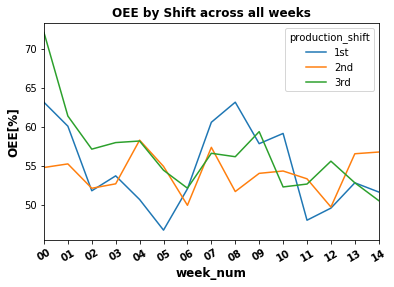

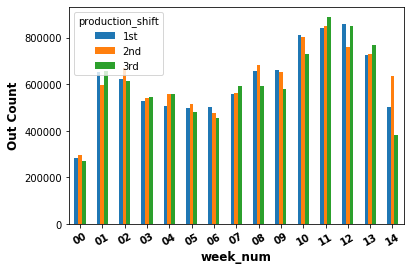

In [58]:
# Group-By week of the year and production shift
group_wps = df_final.groupby(['week_num','production_shift'])
# Plot OEE across all weeks split by shift
group_wps['oee'].mean().round(2).unstack().plot(kind='line',xticks=np.arange(0,15),
                                                rot=30,figsize=(6,4))
plt.title('OEE by Shift across all weeks',fontweight='bold')
plt.ylabel('OEE[%]',fontsize=12,fontweight='bold')
plt.xlabel('week_num',fontsize=12,fontweight='bold')
plt.xticks(fontweight='bold')


# Plot Out Count across all weeks split by shift
group_wps['out_count'].sum().round(2).unstack().plot(kind='bar',figsize=(6,4))
plt.ylabel('Out Count',fontsize=12,fontweight='bold')
plt.xlabel('week_num',fontsize=12,fontweight='bold')
plt.xticks(rotation=30,fontweight='bold')

# To used later
wps_oee_unstack = group_wps.oee.mean().unstack()
wps_oc_unstack = group_wps.out_count.sum().unstack()

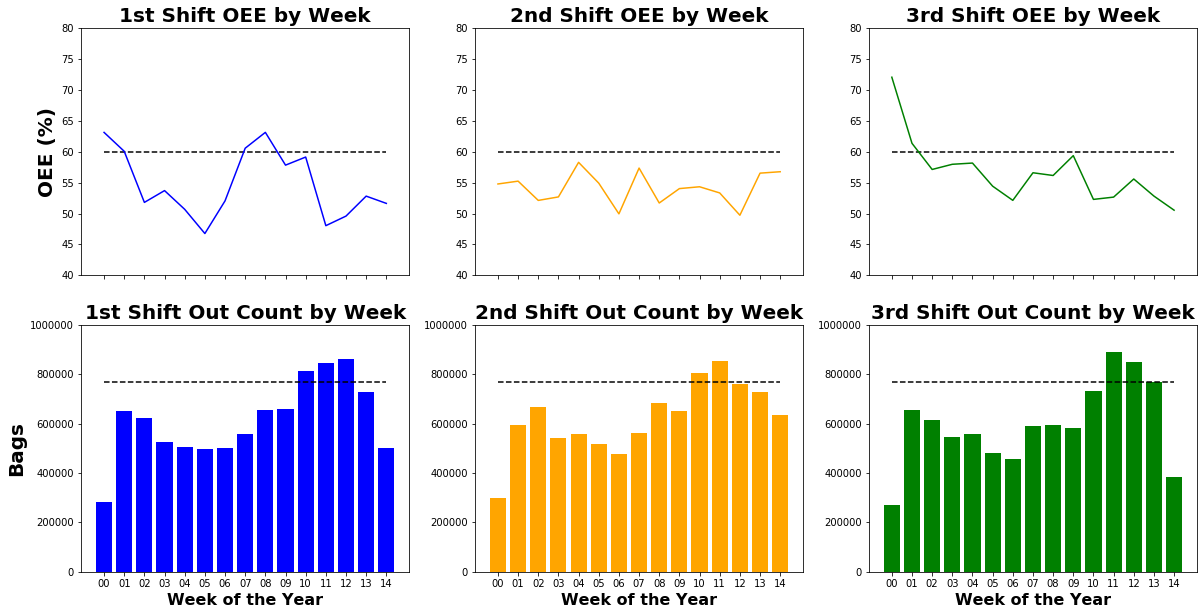

In [59]:
fig, ax = plt.subplots(2,3, figsize = (20,10), sharex=True)

# 1st Shift
ax[0][0].plot(wps_oee_unstack.index, wps_oee_unstack['1st'], color = 'blue')
ax[1][0].bar(wps_oc_unstack.index, wps_oc_unstack['1st'], color = 'blue')
ax[0][0].set_title('1st Shift OEE by Week', fontsize=20, weight='bold')
ax[0][0].set_ylabel('OEE (%)', fontsize=20, weight='bold')
ax[1][0].set_title('1st Shift Out Count by Week', fontsize=20, weight='bold')
ax[1][0].set_ylabel('Bags', fontsize=20, weight='bold')
ax[1][0].set_xlabel('Week of the Year', fontsize=16, weight='bold')
ax[0][0].set(ylim=(40, 80))
ax[1][0].set(ylim=(0, 1000000))
ax[0][0].hlines(60,wps_oee_unstack.index[0], wps_oee_unstack.index[-1], linestyle='--')                   
ax[1][0].hlines(770000,wps_oc_unstack.index[0], wps_oc_unstack.index[-1], linestyle='--')

# 2nd Shift
ax[0][1].plot(wps_oee_unstack.index, wps_oee_unstack['2nd'], color = 'orange')
ax[1][1].bar(wps_oc_unstack.index, wps_oc_unstack['2nd'], color = 'orange')
ax[0][1].set_title('2nd Shift OEE by Week', fontsize=20, weight='bold')
ax[1][1].set_title('2nd Shift Out Count by Week', fontsize=20, weight='bold')
ax[1][1].set_xlabel('Week of the Year', fontsize=16, weight='bold')
ax[0][1].set(ylim=(40, 80))
ax[1][1].set(ylim=(0, 1000000))
ax[0][1].hlines(60,wps_oee_unstack.index[0], wps_oee_unstack.index[-1], linestyle='--')  
ax[1][1].hlines(770000,wps_oc_unstack.index[0], wps_oc_unstack.index[-1], linestyle='--')

# 3rd Shift
ax[0][2].plot(wps_oee_unstack.index, wps_oee_unstack['3rd'], color = 'green')
ax[1][2].bar(wps_oc_unstack.index, wps_oc_unstack['3rd'], color = 'green')
ax[0][2].set_title('3rd Shift OEE by Week', fontsize=20, weight='bold')
ax[1][2].set_title('3rd Shift Out Count by Week', fontsize=20, weight='bold')
ax[1][2].set_xlabel('Week of the Year', fontsize=16, weight='bold')
ax[0][2].set(ylim=(40, 80))
ax[1][2].set(ylim=(0, 1000000))
ax[0][2].hlines(60,wps_oee_unstack.index[0], wps_oee_unstack.index[-1], linestyle='--')  
ax[1][2].hlines(770000,wps_oc_unstack.index[0], wps_oc_unstack.index[-1], linestyle='--')  

plt.show()

AttributeError: 'function' object has no attribute 'set_fontsize'

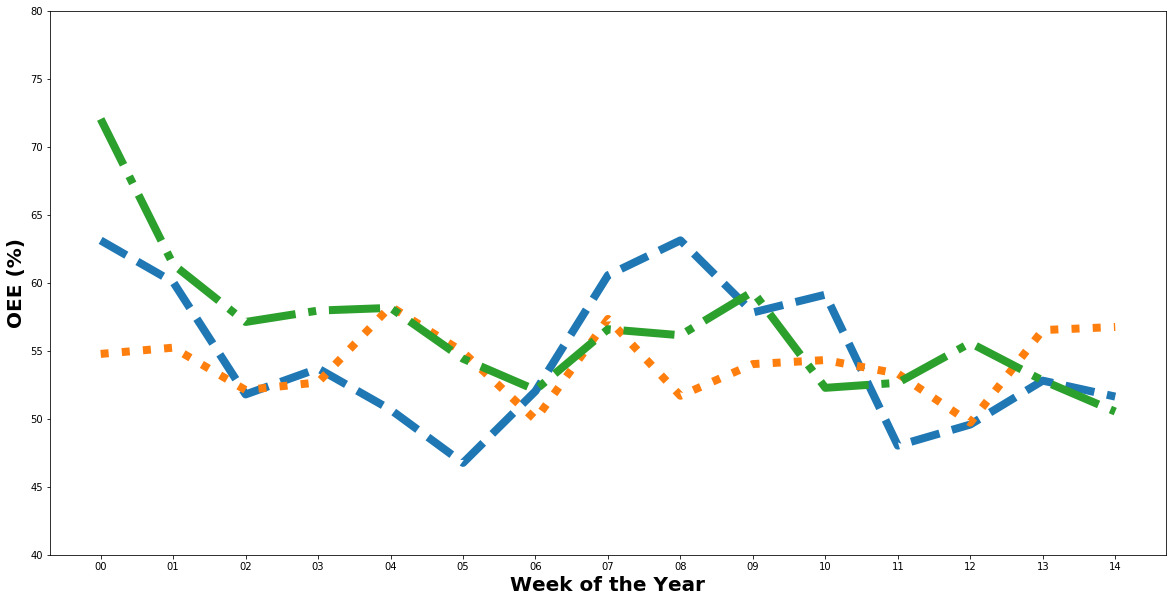

In [61]:
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(wps_oee_unstack.index, wps_oee_unstack['1st'], linewidth = '8', linestyle='--')
ax.plot(wps_oee_unstack.index, wps_oee_unstack['2nd'], linewidth = '8', linestyle=':')
ax.plot(wps_oee_unstack.index, wps_oee_unstack['3rd'], linewidth = '8', linestyle='-.')
ax.set(ylim=(40,80))
ax.set_xlabel('Week of the Year', fontsize=16, weight='bold')
ax.set_ylabel('OEE (%)', fontsize=20, weight='bold')
ax.xaxis.label.set_fontsize(20)
ax.get_yticklabels.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
width = 0.35
shift3 = ax.bar(wps_oc_unstack.index, wps_oc_unstack['1st']+wps_oc_unstack['2nd']+wps_oc_unstack['3rd'], color='green')
shift2 = ax.bar(wps_oc_unstack.index, wps_oc_unstack['1st']+wps_oc_unstack['2nd'], color='orange')
shift1 = ax.bar(wps_oc_unstack.index, wps_oc_unstack['1st'], color='blue')

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
width = 0.35
for n in range(len(wps_oc_unstack['1st'])):
    shift1 = ax.bar(wps_oc_unstack.index[n], wps_oc_unstack['1st'][n], color='royalblue')
    shift2 = ax.bar(wps_oc_unstack.index[n]*2, wps_oc_unstack['2nd'][n], color='orange')
    shift3 = ax.bar(wps_oc_unstack.index[n]*3, wps_oc_unstack['3rd'][n], color='green')
    shift3 = ax.bar(wps_oc_unstack.index[n]*4, 0)
   

plt.show()

In [ ]:
wps_oc_unstack['2nd'][0]

In [ ]:
wps_oc_unstack, wps_oee_unstack

In [ ]:
wps_oc_unstack['1st'].mean()

In [ ]:
# fig, ax = plt.subplots(2,1, figsize = (20,20), sharex=True)
# ax[0].plot(wps_oee_unstack.index, wps_oee_unstack['2nd'], color = 'orange')
# ax[1].bar(wps_oc_unstack.index, wps_oc_unstack['2nd'], color = 'orange')

In [ ]:
# Packline 07 out count data by shift
p07_shift1 = df_final[df_final['location']=='Packing Line 07'].groupby(['week_num', 'production_shift'])['out_count'].sum().unstack()['1st']
p07_shift2 = df_final[df_final['location']=='Packing Line 07'].groupby(['week_num', 'production_shift'])['out_count'].sum().unstack()['2nd']
p07_shift3 = df_final[df_final['location']=='Packing Line 07'].groupby(['week_num', 'production_shift'])['out_count'].sum().unstack()['3rd']

In [ ]:
# Packline 08 out count data by shift
p08_shift1 = df_final[df_final['location']=='Packing Line 08'].groupby(['week_num', 'production_shift'])['out_count'].sum().unstack()['1st']
p08_shift2 = df_final[df_final['location']=='Packing Line 08'].groupby(['week_num', 'production_shift'])['out_count'].sum().unstack()['2nd']
p08_shift3 = df_final[df_final['location']=='Packing Line 08'].groupby(['week_num', 'production_shift'])['out_count'].sum().unstack()['3rd']

### Plot the Out Count for Packing Line 07 and 08
These are the highest producing Packing Lines.

In [ ]:
fig, axes = plt.subplots(2, 1,figsize=(8,6),sharex=True,sharey=True)
# Set position of bar on X axis
barWidth = 0.2
# add_margin = 0
r1 = np.arange(len(p07_shift1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
# Pack Line 07
axes[0].bar(r1, p07_shift1, width=barWidth, edgecolor='black', label='1st Shift')
axes[0].bar(r2, p07_shift2, width=barWidth, edgecolor='black', label='2nd Shift')
axes[0].bar(r3, p07_shift3, width=barWidth, edgecolor='black', label='3rd Shift')

# Pack Line 08
axes[1].bar(r1, p08_shift1, width=barWidth, edgecolor='black', label='1st Shift')
axes[1].bar(r2, p08_shift2, width=barWidth, edgecolor='black', label='2nd Shift')
axes[1].bar(r3, p08_shift3, width=barWidth, edgecolor='black', label='3rd Shift')

# Add xticks and xticklabels on the middle of the group bars
axes[0].set_xticks([r + barWidth for r in range(len(p07_shift1))])
axes[0].set_xticklabels(p07_shift1.index.tolist())
axes[0].legend(['1st Shift','2nd Shift', '3rd Shift'])
axes[1].set_xticks([r + barWidth for r in range(len(p08_shift1))])
axes[1].set_xticklabels(p08_shift1.index.tolist())
axes[1].legend(['1st Shift','2nd Shift', '3rd Shift'])
axes[0].set_title('Packing Line 07 Out Counts',fontweight='bold')
# Add padding between graphs. 
axes[1].set_title('Packing Line 08 Out Counts',fontweight='bold')
pass

** I think it might be best to see a line plot instead to see trends by shift **

In [ ]:
# Group by week of the year, packline location and production shift
group_weeklocshift = df_final.groupby(['week_num','location','production_shift'])
group_weeklocshift['oee'].mean().round(2).unstack().head()

# group_weeklocshift['out_count'].sum().unstack().loc[(slice(None),'Packing Line 14'),:] # get level 1 index of rows.
# group_weeklocshift['oee'].mean().unstack().loc[(slice(None),'Packing Line 09'),:]

## Plot OEE across all weeks by Packline. 

In [ ]:
fig, ax = plt.subplots(3,1,figsize=(10,8),sharex=True,sharey=True)
sh_1_oee = group_weeklocshift['oee'].mean().unstack().unstack()['1st']
sh_2_oee = group_weeklocshift['oee'].mean().unstack().unstack()['2nd']
sh_3_oee = group_weeklocshift['oee'].mean().unstack().unstack()['3rd']
colormap = plt.cm.hsv
colors = [colormap(i) for i in np.linspace(0, 0.9, sh_1_oee.shape[1])]
colordict = dict(zip(sh_1_oee.columns,colors))
for var in sh_1_oee.columns:
    ax[0].plot(sh_1_oee[var], label = var, color = colordict[var])
    ax[1].plot(sh_2_oee[var], color = colordict[var])
    ax[2].plot(sh_3_oee[var], color = colordict[var])
# ax[0].legend(sh_1.columns)
ax[2].legend(bbox_to_anchor=(1.01, 1.65), loc = "center left", 
             prop={'size':13}); 
ax[2].set_ylim(-10,120);

In [ ]:
sh1_outcount = group_weeklocshift['out_count'].sum().unstack().unstack()['1st']
sh2_outcount = group_weeklocshift['out_count'].sum().unstack()['2nd']
sh3_outcount = group_weeklocshift['out_count'].sum().unstack()['3rd']

# plt.hlines(100,0,len(sh1_outcount),linestyles='--');
# plt.ylim(0,120);
plt.xticks(np.arange(0,len(sh1_outcount)),sh1_outcount.index.tolist(),rotation=30,fontweight='bold')
plt.plot(sh1_outcount[['Packing Line 07','Packing Line 08','Packing Line 09']]);
plt.legend(['Packing Line 07','Packing Line 08', 'Packing Line 09'])
plt.yticks(fontweight='bold');
# plt.legend()
# plt.show()
# plt.plot(sh1_outcount['Packing Line 09'])
# sh1_outcount['Packing Line 01'].plot()

sh1_outcount[['Packing Line 07','Packing Line 08','Packing Line 09']]

In [ ]:
plt.plot(sh_1_oee[['Packing Line 09']])
plt.plot(sh1_outcount[['Packing Line 09',]]/1000)

#### Observations: 
1. Seems like packline 09 is consistently >100% OEE is this possible?

2. Also packline 05 has a large outlier oee on week 5. 

3. Packline 14 is almost always 0,expected?

**Should we cap all values above 100 to 100?**

### Samuel other questions to answer: 
**1.** Packing Line 3 old vs. new. - when was old when was new?

**2.** Bagger types: mesh vs. double mesh - add a category

**3.**Packing Line 07 & 08 vs. Packline 09

**4.** Packing Line 03 vs. Packing Line 01. 

## Correlations

In [ ]:
# Correlation plots
# 1) Derive Pearson's pairwise R^2 value. 
# 2) Look at Least Square Residuals
#------------------#

# Normalize out_count by the maximum of each shift across all weeks.
# group_weeklocshift['out_count'].sum().unstack().sum()
outcount_shift1_max = group_weeklocshift['out_count'].sum().unstack().max()['1st']
outcount_shift2_max = group_weeklocshift['out_count'].sum().unstack().max()['2nd']
outcount_shift3_max = group_weeklocshift['out_count'].sum().unstack().max()['3rd']

norm_outcount_shift1 = group_weeklocshift['out_count'].sum().unstack()['1st']/outcount_shift1_max
# norm_outcount_shift1.name = 'out_count_1st'
norm_outcount_shift2 = group_weeklocshift['out_count'].sum().unstack()['2nd']/outcount_shift2_max
norm_outcount_shift3 = group_weeklocshift['out_count'].sum().unstack()['3rd']/outcount_shift3_max

sh_1.stack()/100
sh_2.stack()/100
sh_3.stack()/100

# Find the packline with the overall highest oee mean across weeks


pd.concat([norm_outcount_shift1.unstack(),sh_1/100],axis=0)
shift1_corr = pd.concat([sh_1.stack()/100,norm_outcount_shift1],axis=1)
shift1_corr.columns=['oee','out_count']
shift1_corr.plot(kind='scatter',x='oee',y='out_count')
display(shift1_corr.corr());

shift2_corr = pd.concat([sh_2.stack()/100,norm_outcount_shift2],axis=1)
shift2_corr.columns = ['oee','out_count']
shift2_corr.plot(kind='scatter',x='oee',y='out_count');
display(shift2_corr.corr())

shift3_corr = pd.concat([sh_3.stack()/100,norm_outcount_shift3],axis=1)
shift3_corr.columns = ['oee','out_count']
display(shift3_corr.corr())
sns.scatterplot(data=shift3_corr,x='oee',y='out_count',hue=shift3_corr.index);

shift3_corr.index
# mask = np.ones_like(c,dtype=np.bool)
# mask = np.triu(mask)
# sns.heatmap(c, annot = True, mask = mask)

In [ ]:
group_weeklocshift['out_count'].sum().loc[(slice('01','02'),slice(None),'1st')]

In [ ]:
# Is there a correlation at the aggregate level? 
max_outcount_all = df_final.groupby('week_num').sum()['out_count'].max()
function_dict = {'oee':lambda x: x.mean()/100,
                'out_count': lambda x:x.sum()/max_outcount_all}

all_corr = by_week[['oee','out_count']].agg(function_dict)
all_corr.corr()
mask = np.ones_like(all_corr.corr(),dtype=np.bool)
mask = np.triu(mask)
sns.heatmap(c2, annot = True, mask = mask);
all_corr.plot(kind='scatter',x='oee',y='out_count',s=50)